

<font size = "5"> **AI in STEM - workshop 2020; Day03** </font>

<hr style="height:1px;border-top:4px solid #FF8200" />

# Plotting sidpy Datasets

**Gerd Duscher**

12/09/2020


Here we look at the different plotting routines of sidpy

In [2]:
!pip install sidpy

     |████████████████████████████████| 81kB 3.5MB/s 
     |████████████████████████████████| 481kB 7.4MB/s 
     |████████████████████████████████| 788kB 38.1MB/s 
     |████████████████████████████████| 358kB 39.6MB/s 
  Created wheel for cytoolz: filename=cytoolz-0.11.0-cp36-cp36m-linux_x86_64.whl size=1225638 sha256=cad7470cfc8f5e1a25216580ef90f55bf522531c43960a9c29b62aa4ca9c6d83
  Stored in directory: /root/.cache/pip/wheels/a1/32/3c/9c9926b510647cacdde744b2c7acdf1ccd5896fbb7f8d5df0c
Successfully built cytoolz
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.8 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.16.1 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Suc

In [1]:
# Ensure python 3 compatibility:
from __future__ import division, print_function, absolute_import, unicode_literals
%pylab inline

import sidpy

print(sidpy.__version__)

Populating the interactive namespace from numpy and matplotlib
0.0.3


## Plotting an Image
First, we make a sidpy dataset from a numpy array



In [2]:
x = np.random.normal(3, 2.5, size=(512, 512))
dset = sidpy.Dataset.from_array(x)

Next, we add some information about this dataset



In [3]:
dset.data_type = 'image'
dset.units = 'counts'
dset.quantity = 'intensity'
dset.title = 'random'

For plotting it is important to set the dimensions correctly.



In [4]:
dset.set_dimension(0, sidpy.Dimension(np.arange(dset.shape[0])*.02, 'x'))
dset.x.dimension_type = 'spatial'
dset.x.units = 'nm'
dset.x.quantity = 'distance'
dset.set_dimension(1, sidpy.Dimension(np.arange(dset.shape[1])*.02, 'y'))
dset.y.dimension_type = 'spatial'
dset.y.units = 'nm'
dset.y.quantity = 'distance'

Now we plot the dataset:



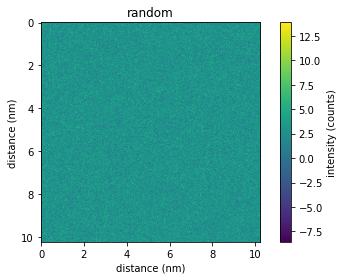

In [5]:
dset.plot()

### Plotting a Complex Image
What if the data form a complex image?

Because, we do not want to start all over again, we will use the ``like_data`` function, 
which copies all metadata onto the new dataset.

The resulting plot consists of two images, which share however the axes, try it out and zoom into one image.

Another feature of the ``plot`` function is that you can add any matplotlib keywords and values to the plot. 

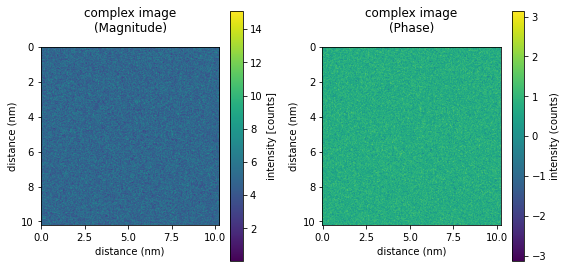

In [6]:

x = x + np.random.normal(3, 2.5, size=(512, 512)) *1j
dset_complex  = dset.like_data(x, 'complex image')
dset_complex.plot(figsize=(8,4))

## Plotting a spectrum

A spectrum can also easily be populated with the apropriete metadata.

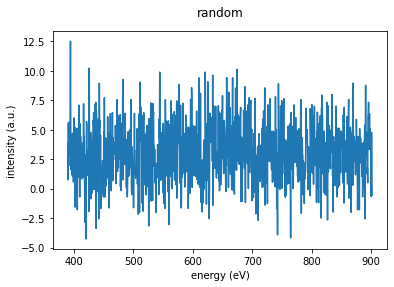

In [7]:
x = np.random.normal(3, 2.5, size=(1024))
dset = sidpy.Dataset.from_array(x)

# dataset metadata
dset.data_type = 'spectrum'
dset.title = 'random'
dset.quantity = 'intensity'
dset.units = 'a.u.'

# dimension with metadata
scale = .5
offset = 390
dset.set_dimension(0, sidpy.Dimension(np.arange(dset.shape[0])*scale+offset, 'energy'))
dset.dim_0.dimension_type = 'spectral'
dset.energy.units = 'eV'
dset.energy.quantity = 'energy'

dset.plot()

## Creating an Image-Stack DataSet
In the following we will make a numpy which resembles a stack of images

In the ``sidpy Dataset`` will set the ``data_type`` to ``image_stack`` for the plotting routine to know how to plot this dataset.

The dimensions have to contain at least two ``spatial`` dimensions and one that is identifiable as a stack dimension ('stack, 'frame', 'time').
First we make a stack of images



In [8]:
x = np.random.normal(3, 2.5, size=(25, 512, 512))

dset = sidpy.Dataset.from_array(x)
dset.data_type = 'image_stack'
dset.units = 'counts'
dset.quantity = 'intensity'

dset.set_dimension(0, sidpy.Dimension(np.arange(dset.shape[0]), 'frame'))
dset.frame.dimension_type = 'temporal'
dset.set_dimension(1, sidpy.Dimension(np.arange(dset.shape[1])*.02, 'x'))
dset.x.dimension_type = 'spatial'
dset.x.units = 'nm'
dset.x.quantity = 'distance'
dset.set_dimension(2, sidpy.Dimension(np.arange(dset.shape[2])*.02, 'y'))
dset.y.dimension_type = 'spatial'
dset.y.units = 'nm'
dset.y.quantity = 'distance'

## Plotting the Dataset
Please note that the scroll wheel will move you through the stack, also the slider and the play button will let you navigate through this image stack.

Zoom to an area and let it play!

Click on the ``Average`` button and then click on it again.



In [9]:
dset.plot()

TypeError: ignored

ValueError: ignored

<Figure size 432x288 with 2 Axes>

The kwargs dictionary is used to plot the image stack in TEM style with scale bar



In [10]:
kwargs = {'scale_bar': True, 'cmap': 'hot'}  # or maby 'cmap': 'gray'
 
dset.plot(verbose=True, **kwargs)

Shape of dataset is:  (25, 512, 512)
3D dataset


TypeError: ignored

ValueError: ignored

<Figure size 432x288 with 1 Axes>

## Plot Dataset as Spectral Image
We need to change the data_type of the dataset to ``spectral_image`` and the dimension_type of one dimension to ``spectral``.

Now the plot function plots it as a spectrum image.

Select the spectrum with the mouse (left click).



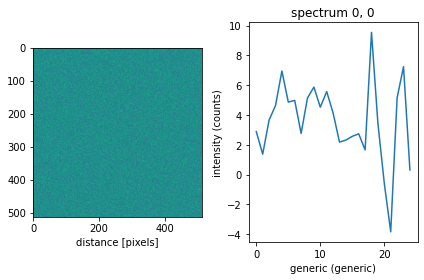

In [11]:
dset.data_type = 'spectral_image'
dset.set_dimension(0, sidpy.Dimension(np.arange(dset.shape[0]),'spectrum'))
dset.spectrum.dimension_type = 'spectral'

dset.plot()

We make the selection more visible by setting the binning of the spectra selection.

The binning avrages over the binning box.

Run the code-cell below and look in the plot above.



In [12]:
dset.view.set_bin([20, 20])

plt.show()

The axes (and figure) instances of matplotlib can be accessed throught the ``view`` attribute of  the sidpy dataset.

The code cell below will draw a red square lattice on the plot ``above``


In [13]:
x, y = np.mgrid[0:501:100, 0:501:100] + 5
dset.view.axes[0].scatter(x, y, color='red');

The plotting routine can also be used independently. 

Please note, that a reference (here the variable `view`) must be maintained for interactive plotting.

In [14]:
kwargs = {'scale_bar': True, 'cmap': 'hot'}
dset.set_dimension(0, sidpy.Dimension(np.arange(dset.shape[0]),'frame'))
dset.frame.dimension_type = 'temporal'

view = sidpy.viz.dataset_viz.ImageStackVisualizer(dset, **kwargs)

TypeError: ignored

ValueError: ignored

<Figure size 432x288 with 1 Axes>

In the same way as above, we can plot the dataset as an image. 

Please note, that we did not have to set the `data_type` of the dataset.

(25, 512, 512)


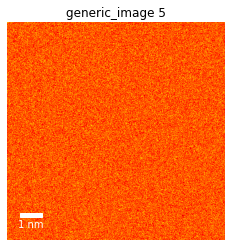

In [15]:
print(dset.shape)
kwargs = {'scale_bar': True, 'cmap': 'hot'}
view = sidpy.viz.dataset_viz.ImageVisualizer(dset, image_number=5, **kwargs)